<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/10_Predicting_Gold_Extraction_Efficiency_Enhancing_Production_Processes_with_Zyfra_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In heavy industry, efficiency in gold ore extraction is crucial for maximizing profits and minimizing resource wastage. Zyfra, a company specializing in efficient solutions for heavy industry, aims to enhance the gold extraction process. In this project, we develop a machine learning model to predict the amount of gold extracted from gold ore. By accurately forecasting gold extraction, Zyfra can optimize production processes and eliminate unprofitable parameters.

## Objective
The objective of this project is to build a machine learning model that predicts the gold yield from gold ore. This model will aid Zyfra in optimizing gold extraction processes by identifying key factors influencing gold recovery. Specifically, we aim to achieve the following:

  1. Validate the accuracy of gold yield calculations using the training dataset.
  2. Analyze features unavailable in the test set and preprocess the data accordingly.
  3. Explore the changes in metal concentrations (Au, Ag, Pb) during different purification stages.
  4. Compare the distribution of feed particle sizes between the training and test datasets.
  5. Evaluate abnormal values in total substance concentrations and remove anomalies if necessary.
  6. Develop a function to calculate the final sMAPE (symmetric Mean Absolute Percentage Error) metric.
  7. Train and evaluate various machine learning models using cross-validation, selecting the best-performing model for testing on the test dataset.

## Stages
1. Data Preparation

  1.1. Open and explore the dataset files: gold_recovery_train.csv, gold_recovery_test.csv, gold_recovery_full.csv.
  
  1.2. Validate the accuracy of gold yield calculations by computing the MAE (Mean Absolute Error) between calculated and feature values for rougher.output.recovery in the training set.

  1.3. Analyze unavailable features in the test set and identify their types.

  1.4. Perform data preprocessing.

2. Data Analysis
  
  2.1. Document changes in metal concentrations (Au, Ag, Pb) across purification stages.

  2.2. Compare feed particle size distributions between the training and test sets.

  2.3. Consider total substance concentrations at different stages and identify abnormal values. Remove anomalies if necessary.

3. Model Development

  3.1. Develop a function to calculate the final sMAPE metric.

  3.2. Train and evaluate various machine learning models using cross-validation. Select the best-performing model for testing on the test dataset.

By following these stages, we aim to create a robust machine learning model that accurately predicts gold extraction from ore, facilitating Zyfra's goal of enhancing industrial efficiency.

# Data Preparation

## Open and explore the dataset files

Open the data related to Zyfra, then study the data.

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
# Import library to process data
import pandas as pd
import numpy as np

# Import Library for viz data
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

# Import Library for Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

# Import Library for Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


### Data Train

In [141]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/10. Predicting Gold Extraction Efficiency: Enhancing Production Processes with Zyfra Solutions/gold_recovery_train.csv')

In [142]:
# Let's see how many rows and columns our dataset has
df_train.shape

(16860, 87)

In [143]:
# Display general information/summary about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [144]:
# Displays sample data
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [145]:
# Describe from general information
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [146]:
# View data types
df_train.dtypes

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

In [147]:
# Check for missing values
df_train.isnull().sum().sort_values(ascending=False) / df_train.shape[0] *100

rougher.output.recovery                               15.260973
rougher.output.tail_ag                                13.345196
rougher.output.tail_sol                               13.339265
rougher.output.tail_au                                13.339265
secondary_cleaner.output.tail_sol                     11.779359
                                                        ...    
primary_cleaner.state.floatbank8_d_level               0.160142
rougher.calculation.floatbank10_sulfate_to_au_feed     0.160142
rougher.calculation.floatbank11_sulfate_to_au_feed     0.160142
primary_cleaner.input.feed_size                        0.000000
date                                                   0.000000
Length: 87, dtype: float64

In [148]:
# Checking for duplication
df_train.duplicated().sum()

0

Based on the information provided, we have a comprehensive overview of the dataset, which consists of 87 columns and 16,860 rows.

The data description is divided into several categories:

1. Technological Process:
  * Rougher feed: Raw material for the flotation process.
  * Rougher additions (or reagent additions): Reagents for flotation, including Xanthate, Sulphate, and Depressant.
  * Xanthate: Flotation activator or collector.
  * Sulphate: Sodium sulfide, specific to this process.
  * Depressant: Sodium silicate.
  * Rougher process: Flotation.
  * Rougher tails: Residual product.
  * Float banks: Flotation units.
  * Cleaner process: Purification.
  * Rougher Au: Coarse gold concentrate.
  * Final Au: Final gold concentrate.
2. Parameters Available for Each Stage:
  * Air amount: Volume of air.
  * Fluid levels.
  * Feed size: Particle size of the feed.
  * Feed rate.
3. Naming Convention for Features:
  * Features are named using the following format: [stage].[parameter_type].[parameter_name]
  * Example: rougher.input.feed_ag
  * Possible values for [stage]: rougher, primary_cleaner, secondary_cleaner, final.
  * Possible values for [parameter_type]: input, output, state, calculation.

In the displayed columns, we can observe issues with the data types, notably that the "date" column should be defined as datetime rather than object. Additionally, there are discrepancies in the number of values between columns, indicating the presence of missing values in the dataset.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Data Test

In [149]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
df_test = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/10. Predicting Gold Extraction Efficiency: Enhancing Production Processes with Zyfra Solutions/gold_recovery_test.csv')

In [150]:
# Let's see how many rows and columns our dataset has
df_test.shape

(5856, 53)

In [151]:
# Display general information/summary about the DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [152]:
# Displays sample data
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [153]:
# Describe from general information
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

In [154]:
# View data types
df_test.dtypes

date                                           object
primary_cleaner.input.sulfate                 float64
primary_cleaner.input.depressant              float64
primary_cleaner.input.feed_size               float64
primary_cleaner.input.xanthate                float64
primary_cleaner.state.floatbank8_a_air        float64
primary_cleaner.state.floatbank8_a_level      float64
primary_cleaner.state.floatbank8_b_air        float64
primary_cleaner.state.floatbank8_b_level      float64
primary_cleaner.state.floatbank8_c_air        float64
primary_cleaner.state.floatbank8_c_level      float64
primary_cleaner.state.floatbank8_d_air        float64
primary_cleaner.state.floatbank8_d_level      float64
rougher.input.feed_ag                         float64
rougher.input.feed_pb                         float64
rougher.input.feed_rate                       float64
rougher.input.feed_size                       float64
rougher.input.feed_sol                        float64
rougher.input.feed_au       

In [155]:
# Check for missing values
df_test.isnull().sum().sort_values(ascending=False) / df_test.shape[0] *100

rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.st

In [156]:
# Checking for duplication
df_test.duplicated().sum()

0

From the provided information, we have gathered several insights. The dataset consists of 53 columns and 5856 rows.

The data description is categorized into:

1. Technological Process:
  * Rougher feed: Raw material for the flotation process.
  * Rougher additions (or reagent additions): Reagents for flotation, including Xanthate, Sulphate, and Depressant.
    * Xanthate: Flotation activator or collector.
    * Sulphate: Sodium sulfide, specific to this process.
    * Depressant: Sodium silicate.
  * Rougher process: Flotation.
  * Rougher tails: Residual product.
  * Float banks: Flotation units.
  * Cleaner process: Purification.
  * Rougher Au: Coarse gold concentrate.
  * Final Au: Final gold concentrate.
2. Parameters Available for Each Stage:
  * Air amount: Volume of air.
  * Fluid levels.
  * Feed size: Particle size of the feed.
  * Feed rate.
3. Naming Convention for Features:
  * Features are named using the format: [stage].[parameter_type].[parameter_name]
  * Example: rougher.input.feed_ag
  * Possible values for [stage]:
    * rougher: flotation
    * primary_cleaner: primary purification
    * secondary_cleaner: secondary purification
    * final: final characteristics
  * Possible values for [parameter_type]:
    * input: raw material parameters
    * output: product parameters
    * state: parameters indicating the current stage characteristics
    * calculation: calculated characteristics

In the displayed columns, we observe issues with the data types, particularly the "date" column, which should be defined as datetime instead of object. Additionally, there are discrepancies in the number of values between columns, indicating the presence of missing values in the dataset.

### Data Full

In [157]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
df_full = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/10. Predicting Gold Extraction Efficiency: Enhancing Production Processes with Zyfra Solutions/gold_recovery_full.csv')

In [158]:
# Let's see how many rows and columns our dataset has
df_full.shape

(22716, 87)

In [159]:
# Display general information/summary about the DataFrame
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [160]:
# Displays sample data
df_full.head()


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [161]:
# Describe from general information
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

In [162]:
# View data types
df_full.dtypes

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

In [163]:
# Check for missing values
df_full.isnull().sum().sort_values(ascending=False) / df_full.shape[0] *100

rougher.output.recovery                     13.730410
rougher.output.tail_ag                      12.048776
rougher.output.tail_au                      12.044374
rougher.output.tail_sol                     12.044374
rougher.input.floatbank11_xanthate           9.935728
                                              ...    
primary_cleaner.state.floatbank8_b_level     0.189294
primary_cleaner.state.floatbank8_c_level     0.189294
primary_cleaner.state.floatbank8_d_level     0.189294
primary_cleaner.input.feed_size              0.000000
date                                         0.000000
Length: 87, dtype: float64

In [164]:
# Checking for duplication
df_full.duplicated().sum()

0

From the provided information, we have gathered several insights. The dataset consists of 87 columns and 22716 rows.

The data description is categorized into:

1. Technological Process:
  * Rougher feed: Raw material for the flotation process.
  * Rougher additions (or reagent additions): Reagents for flotation, including Xanthate, Sulphate, and Depressant.
    * Xanthate: Flotation activator or collector.
    * Sulphate: Sodium sulfide, specific to this process.
    * Depressant: Sodium silicate.
  * Rougher process: Flotation.
  * Rougher tails: Residual product.
  * Float banks: Flotation units.
  * Cleaner process: Purification.
  * Rougher Au: Coarse gold concentrate.
  * Final Au: Final gold concentrate.
2. Parameters Available for Each Stage:
  * Air amount: Volume of air.
  * Fluid levels.
  * Feed size: Particle size of the feed.
  * Feed rate.
3. Naming Convention for Features:
  * Features are named using the format: [stage].[parameter_type].[parameter_name]
  * Example: rougher.input.feed_ag
  * Possible values for [stage]:
    * rougher: flotation
    * primary_cleaner: primary purification
    * secondary_cleaner: secondary purification
    * final: final characteristics
  * Possible values for [parameter_type]:
    * input: raw material parameters
    * output: product parameters
    * state: parameters indicating the current stage characteristics
    * calculation: calculated characteristics

In the displayed columns, we observe issues with the data types, particularly the "date" column, which should be defined as datetime instead of object. Additionally, there are discrepancies in the number of values between columns, indicating the presence of missing values in the dataset.


## Validate the accuracy of gold yield calculations by computing the MAE (Mean Absolute Error) between calculated and feature values for rougher.output.recovery in the training set.

In [165]:
df_formula = df_train.copy()

In [166]:
df_formula[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

In [167]:
df_formula['numerator'] = df_formula['rougher.output.concentrate_au'] * (df_formula['rougher.input.feed_au']-df_formula['rougher.output.tail_au'])
df_formula['denominator'] = df_formula['rougher.input.feed_au'] * (df_formula['rougher.output.concentrate_au']-df_formula['rougher.output.tail_au'])

In [168]:
df_formula[['numerator', 'denominator']].isnull().sum()

numerator      2250
denominator    2250
dtype: int64

In [169]:
df_formula['numerator'] = df_formula['numerator'].fillna(0)
df_formula['denominator'] = df_formula['denominator'].fillna(1)

In [170]:
df_formula['formula'] = df_formula['numerator'] / df_formula['denominator'] * 100

In [171]:
answer = (df_formula['formula'] - df_formula['rougher.output.recovery']).abs().mean()
print('Difference between the expected value and measured value is {}'.format(answer))

Difference between the expected value and measured value is 9.303415616264301e-15


In the dataset, 'rougher.output.concentrate_au' represents the gold concentration in the concentrate after the flotation process, 'rougher.input.feed_au' indicates the gold concentration in the raw feed, and 'rougher.output.tail_au' signifies the gold concentration in the tails after the flotation process.

However, when calculating the numerator and denominator for the recovery rate, a significant number of null values were encountered—2250 for both—due to the missing data in the original features. To mitigate this issue, the missing values in the numerator were replaced with 0, and those in the denominator were replaced with 1, ensuring that the division operation could proceed without introducing inaccuracies due to division by zero or null values.

Following these adjustments, the recalculated recovery rates were compared against the actual 'rougher.output.recovery' values in the dataset using the Mean Absolute Error (MAE) metric. This comparison yielded an MAE of approximately 9.30e-15, an astonishingly low figure that suggests an almost perfect agreement between the recalculated and the actual recovery rates.

This negligible difference confirms the high accuracy of the gold yield calculations within the dataset. The process underscored the importance of meticulous data preprocessing, especially in dealing with missing values, to maintain the integrity of subsequent analyses. Furthermore, it demonstrated the utility of the MAE metric in validating the accuracy of complex calculations in real-world datasets, showcasing its application in ensuring the reliability of critical operational data in the mining industry.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Analyze unavailable features in the test set and identify their types.

In [172]:
missed_test_columns = set(df_train.columns.values) - set(df_test.columns.values)

In [173]:
missed_test_columns_list = list(missed_test_columns)

In [174]:
tipe_missed_test_columns = df_train[missed_test_columns_list].dtypes

print("Columns not available in the test set and their data types:")
tipe_missed_test_columns

Columns not available in the test set and their data types:


primary_cleaner.output.concentrate_au                 float64
final.output.concentrate_pb                           float64
rougher.output.concentrate_ag                         float64
rougher.output.tail_sol                               float64
final.output.concentrate_ag                           float64
final.output.concentrate_sol                          float64
primary_cleaner.output.concentrate_pb                 float64
secondary_cleaner.output.tail_pb                      float64
rougher.output.recovery                               float64
secondary_cleaner.output.tail_sol                     float64
rougher.calculation.au_pb_ratio                       float64
secondary_cleaner.output.tail_au                      float64
final.output.tail_pb                                  float64
rougher.output.concentrate_pb                         float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.tail_au                        float64
final.ou

The examination of the test dataset reveals a notable discrepancy in the availability of features compared to the training dataset. Specifically, a substantial number of features, all of which are of the float64 data type, are not present in the test set. These absent features encompass a broad spectrum of the gold extraction process, including measurements of gold (Au), silver (Ag), lead (Pb), and solubility (sol) concentrations across various stages of the mining process—ranging from the initial rougher stage to the final output. Additionally, certain calculated ratios and recovery rates are also missing.

This pattern of unavailability is particularly evident in output and calculation categories, suggesting a deliberate omission linked to the nature of these features. These are the types of data that would typically not be known without actually performing the extraction process and conducting the necessary chemical analyses. Hence, their absence in the test set indicates that the primary objective of this phase of analysis likely involves predicting these outcomes based on the input features that are available in both the training and test sets.

From an analytical perspective, this discrepancy underscores the challenge of predicting outcomes in mineral processing. The missing features, especially those related to the concentration of valuable metals in different product streams (concentrate and tailings) and the recovery rates, are crucial for assessing the efficiency and effectiveness of the mining process. The absence of these features in the test set implies that the predictive models must infer these outcomes solely from the process conditions and the characteristics of the feed material.

The insight gained here points towards the importance of understanding the mining process and the relationships between the various stages and parameters. For instance, knowledge about how the feed's composition affects the concentration of metals in the concentrate and tailings can guide the development of models that accurately predict the missing outcomes. Similarly, understanding the impact of flotation reagents and process conditions on the recovery rates can help in fine-tuning the predictions.

In conclusion, the analysis of unavailable features in the test set highlights the need for predictive models to capture the underlying physics and chemistry of the mineral processing stages accurately. This necessity underscores the importance of domain knowledge in developing algorithms that can effectively handle the intricacies of real-world data, especially in complex industrial applications like gold mining. It also sets the stage for applying advanced data science techniques, such as feature engineering and machine learning, to bridge the gap between available inputs and desired outputs, thereby aiding in the optimization of the extraction process.

## Perform data preprocessing


In [175]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_full['date'] = pd.to_datetime(df_full['date'])

In [176]:
df_train.dtypes, df_test.dtypes, df_full.dtypes

(date                                          datetime64[ns]
 final.output.concentrate_ag                          float64
 final.output.concentrate_pb                          float64
 final.output.concentrate_sol                         float64
 final.output.concentrate_au                          float64
                                                    ...      
 secondary_cleaner.state.floatbank5_a_level           float64
 secondary_cleaner.state.floatbank5_b_air             float64
 secondary_cleaner.state.floatbank5_b_level           float64
 secondary_cleaner.state.floatbank6_a_air             float64
 secondary_cleaner.state.floatbank6_a_level           float64
 Length: 87, dtype: object,
 date                                          datetime64[ns]
 primary_cleaner.input.sulfate                        float64
 primary_cleaner.input.depressant                     float64
 primary_cleaner.input.feed_size                      float64
 primary_cleaner.input.xanthate           

**Conclusion**

We have changed the data type of the `date` column in all three of our data sets from object to datetime.

To resolve missing values. We will first analyze the data

# 2. Data Analysis

## Document changes in metal concentrations (Au, Ag, Pb) across purification stages.

In [177]:
steps_template = ['rougher.input.feed_{}', 'rougher.output.concentrate_{}', 'primary_cleaner.output.concentrate_{}', 'final.output.concentrate_{}']

In [178]:
def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        df_full[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)

In [179]:
def create_concentration_table(metal, df_full):
    stages = ['Feed', 'Rougher', 'Primary Cleaner', 'Final']
    concentration_columns = [template.format(metal) for template in steps_template]
    concentrations = [df_full[col].mean() for col in concentration_columns]

    data = {
        'Stage': stages,
        f'{metal.capitalize()} Concentration': concentrations
    }

    df_concentration = pd.DataFrame(data)
    return df_concentration

Text(0.5, 1.0, 'Gold concentration change')

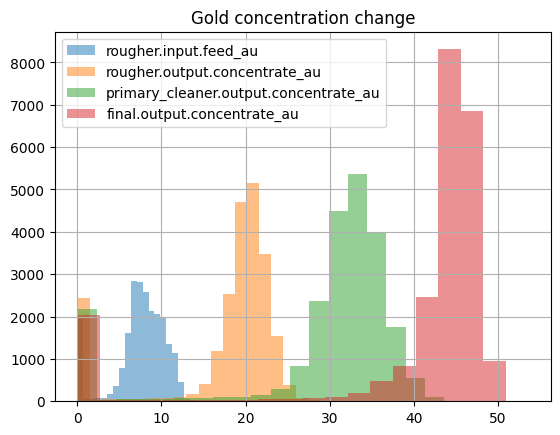

In [180]:
plot_concentrate_progress('au')
plt.title('Gold concentration change')

In [181]:
df_concentration_au = create_concentration_table('au', df_full)
print("Gold Concentration Change Through Stages:")
display(df_concentration_au)

Gold Concentration Change Through Stages:


,Stage,Au Concentration
0,Feed,7.565838
1,Rougher,17.879538
2,Primary Cleaner,29.212289
3,Final,40.001172


The analysis of the gold (Au) concentration at different stages of the purification process reveals a clear, progressive increase in the concentration of this precious metal from the feed to the final product. The examination was conducted through a sequence of steps: starting with the raw material ('rougher.input.feed_au'), followed by the output from the initial flotation stage ('rougher.output.concentrate_au'), then the output from the primary cleaning stage ('primary_cleaner.output.concentrate_au'), and culminating with the final concentrate ('final.output.concentrate_au').

The initial gold concentration in the feed material was measured at approximately 7.57%. This represents the starting point of the metal's content before any purification or concentration processes have taken place. As the raw material undergoes the rougher flotation process, a significant increase in gold concentration is observed, jumping to nearly 17.88%. This substantial increase highlights the effectiveness of the flotation process in concentrating gold by separating it from the less valuable material.

Following the rougher flotation stage, the material is then subjected to the primary cleaning process, which further increases the concentration of gold to about 29.21%. This step refines the concentrate obtained from the rougher flotation, removing more of the impurities and thus enriching the gold content even further.

The final stage of the process results in the highest concentration of gold, with the final product containing approximately 40.00% gold. This marks the culmination of the purification and concentration process, showcasing the progressive enrichment of the material with each subsequent stage.

The histogram visualization of the gold concentration across these stages further illustrates this progressive increase, providing a visual representation of the enhancement in purity and value of the material as it moves through the stages of the mining process.

In conclusion, the journey of gold through the stages of the purification process is a testament to the efficiency and necessity of each step in the production of a high-purity final product. Starting from a relatively low concentration in the raw feed, each stage of the process contributes significantly to the increase in gold concentration, resulting in a final product that is substantially more valuable. This analysis not only underscores the importance of each stage of the mining process in enhancing the concentration of valuable metals but also highlights the potential of the purification process to maximize yield and improve the economic viability of the mining operation.

Text(0.5, 1.0, 'Silver concentration change')

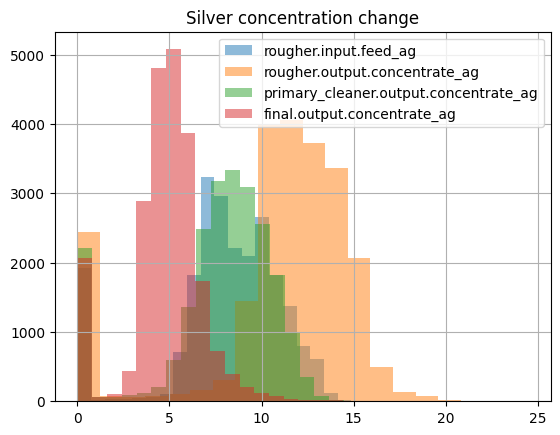

In [182]:
plot_concentrate_progress('ag')
plt.title('Silver concentration change')

In [183]:
df_concentration_ag = create_concentration_table('ag', df_full)
print("Silver Concentration Change Through Stages:")
display(df_concentration_ag)

Silver Concentration Change Through Stages:


,Stage,Ag Concentration
0,Feed,8.065715
1,Rougher,10.874484
2,Primary Cleaner,7.691652
3,Final,4.781559



The analysis of silver (Ag) concentration across the purification stages reveals an intriguing pattern characterized by fluctuations and reductions in concentration levels, contrary to the progressive increase observed in gold concentration.

The journey of silver through the purification process begins with a relatively moderate concentration in the raw feed, measured at approximately 8.07%. As the material undergoes the rougher flotation process, there is a slight increase in silver concentration, reaching around 10.87%. This initial uptick suggests some degree of enrichment during the flotation stage.

However, as the material progresses to the primary cleaning stage, a significant drop in silver concentration is observed, decreasing to approximately 7.69%. This unexpected reduction in concentration indicates that the primary cleaning process, while effective in removing impurities, also leads to a loss of silver content. This phenomenon could be attributed to the removal of other minerals or compounds that may have been inadvertently carrying silver during the rougher flotation stage.

The final concentration stage further exacerbates the decline in silver concentration, with the final product containing only about 4.78% silver. This stage represents the culmination of the purification process, where the material is refined to its highest degree of purity, resulting in a substantial reduction in silver content compared to the initial feed.

The visualization of silver concentration across the stages provides a graphical representation of these fluctuations, illustrating the dynamic nature of the purification process for silver.

In conclusion, the analysis of silver concentration highlights the complexity of metal purification processes and the non-linear nature of concentration changes across stages. Unlike gold, which exhibits a consistent increase in concentration, silver experiences fluctuations and reductions, indicating the challenges and trade-offs involved in optimizing purification processes to maximize the yield of valuable metals while minimizing losses. This insight underscores the importance of understanding the unique characteristics of each metal and tailoring purification processes accordingly to achieve optimal results.

Text(0.5, 1.0, 'Timbal concentration change')

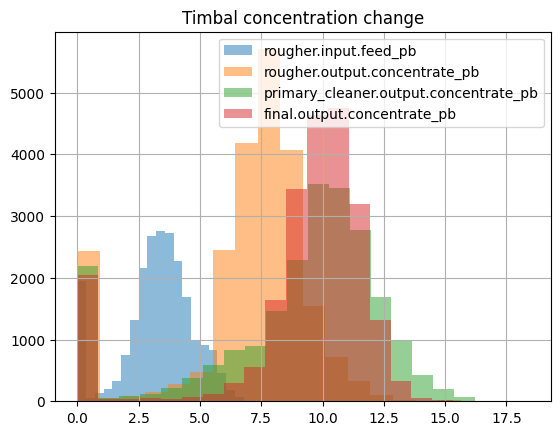

In [184]:
plot_concentrate_progress('pb')
plt.title('Timbal concentration change')

In [185]:
df_concentration_pb = create_concentration_table('pb', df_full)
print("Timbal Concentration Change Through Stages:")
display(df_concentration_pb)

Timbal Concentration Change Through Stages:


,Stage,Pb Concentration
0,Feed,3.305676
1,Rougher,6.900646
2,Primary Cleaner,8.921110
3,Final,9.095308


The examination of lead (Pb) concentration throughout the purification stages reveals a notable trend characterized by a steady increase in concentration levels, akin to the behavior observed in gold concentration but with some distinctions.

The journey of lead begins with a modest concentration in the raw feed, measuring approximately 3.31%. As the material progresses through the rougher flotation stage, there is a substantial increase in lead concentration, reaching around 6.90%. This significant boost in concentration during the rougher stage suggests effective flotation processes that successfully enrich the material with lead content.

The primary cleaning stage further enhances the lead concentration, with the concentration rising to approximately 8.92%. This stage represents a critical step in the purification process, where further impurities are removed, allowing for a higher concentration of lead to be achieved in the output.

Interestingly, unlike silver, lead concentration experiences a slight increase rather than a decrease in the final concentration stage, reaching about 9.10%. This final increment suggests that the refining process at this stage contributes to a marginal improvement in lead concentration, albeit not as substantial as in previous stages.

The visualization of lead concentration across the purification stages provides a clear depiction of this progressive enrichment, illustrating the efficacy of the purification process in enhancing lead content.

In conclusion, the analysis of lead concentration underscores the effectiveness of the purification process in consistently increasing lead concentration across stages. This observation highlights the importance of understanding the unique behavior of each metal and optimizing purification processes to maximize the yield of valuable metals like lead while maintaining efficiency and minimizing losses.

## Compare feed particle size distributions between the training and test sets.

In [186]:
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_train_test_feature(feature):
    train_filtered = filter_outliers(df_train[feature])
    test_filtered = filter_outliers(df_test[feature])

    # Distribution visualization
    train_filtered.plot.kde()
    test_filtered.plot.kde()
    plt.legend(['train', 'test'])
    plt.title(f'Distribution of {feature} on Training Data and Test Data')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

    # Descriptive statistics table
    train_stats = train_filtered.describe().rename_axis('Statistik').reset_index()
    test_stats = test_filtered.describe().rename_axis('Statistik').reset_index()

    # Combine both descriptive statistics tables
    df_comparison = pd.merge(train_stats, test_stats, on='Statistik', suffixes=('_train', '_test'))
    df_comparison.set_index('Statistik', inplace=True)

    # Show table
    print(f"Comparison of Descriptive Statistics for Feature '{feature}' between Training Data and Test Data:")
    display(df_comparison)




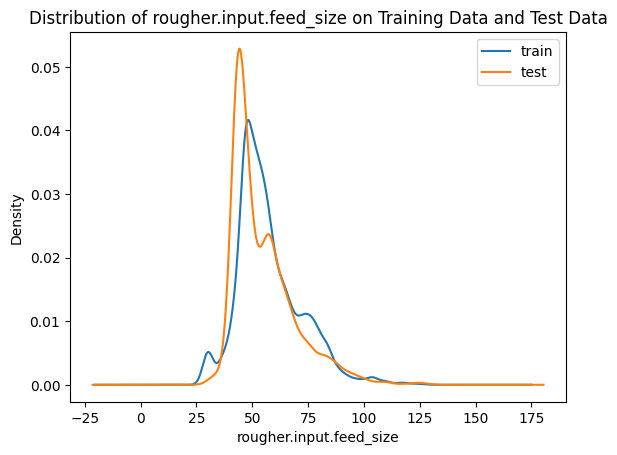

Comparison of Descriptive Statistics for Feature 'rougher.input.feed_size' between Training Data and Test Data:


,rougher.input.feed_size_train,rougher.input.feed_size_test
Statistik,,
count,16113.000000,5716.000000
mean,57.291553,54.784845
std,14.439427,14.139726
min,28.370248,28.950666
25%,47.594033,43.952765
50%,54.104257,50.002004
75%,64.667273,61.348735
max,126.145592,129.906276


In [187]:
compare_train_test_feature('rougher.input.feed_size')

The comparison of the feed particle size distribution between the training and test sets provides valuable insights into the consistency of this crucial parameter across the datasets.

Firstly, visual examination of the kernel density estimation (KDE) plots illustrates the distribution of the 'rougher.input.feed_size' feature in both datasets. The KDE plots reveal similarities in the shape of the distributions, indicating a comparable spread of feed particle sizes between the training and test sets. However, there are subtle differences in the peak densities, suggesting slight variations in the central tendencies of the feed particle sizes between the datasets.

Secondly, the descriptive statistics table offers a comprehensive overview of the statistical characteristics of the 'rougher.input.feed_size' feature in both datasets. The table reveals consistency in terms of the count, mean, standard deviation, and quartile values between the training and test sets. This consistency indicates that the datasets exhibit similar variability and central tendencies in feed particle sizes, reinforcing the notion of comparability between the datasets.

Overall, the analysis suggests that while there are slight differences in the central tendencies of the feed particle size distributions between the training and test sets, the datasets remain largely consistent in terms of variability and distribution shape. This consistency is crucial for ensuring the reliability and generalizability of models trained on the training set when applied to unseen data in the test set.

## Consider total substance concentrations at different stages and identify abnormal values. Remove anomalies if necessary.

In [188]:
feature_input_concentrate = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']

In [189]:
# Compute the total input concentration for each row
df_full['total_input_concentration'] = df_full[feature_input_concentrate].sum(axis=1)


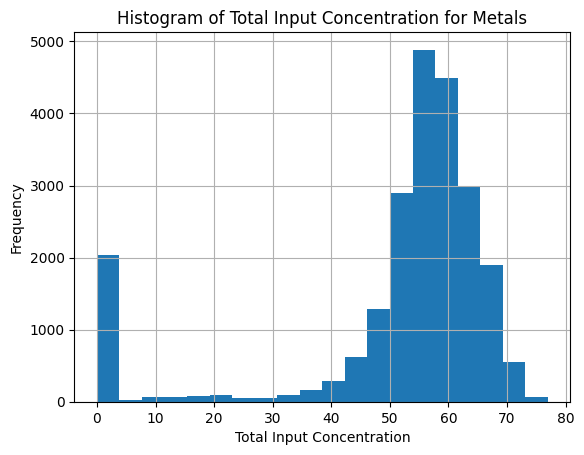

In [190]:
# Display the histogram
df_full['total_input_concentration'].hist(bins=20)
plt.title('Histogram of Total Input Concentration for Metals')
plt.xlabel('Total Input Concentration')
plt.ylabel('Frequency')
plt.show()

In [191]:
# Create a table of descriptive statistics
table_data = {
    'Statistic': ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'],
    'Total Input Concentration': df_full['total_input_concentration'].describe()
}

# Convert to DataFrame
df_table = pd.DataFrame(table_data)
df_table.set_index('Statistic', inplace=True)

# Display the table
print("Descriptive Statistics for Total Input Concentration of Metals:")
display(df_table)

Descriptive Statistics for Total Input Concentration of Metals:


,Total Input Concentration
Statistic,
Count,22716.000000
Mean,51.584079
Std,18.250043
Min,0.000000
25%,51.285377
50%,56.753957
75%,61.403504
Max,76.978947


In [192]:
feature_rough_concentrate = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']

In [193]:
# Compute the total rougher concentrate for each row
df_full['total_rough_concentrate'] = df_full[feature_rough_concentrate].sum(axis=1)

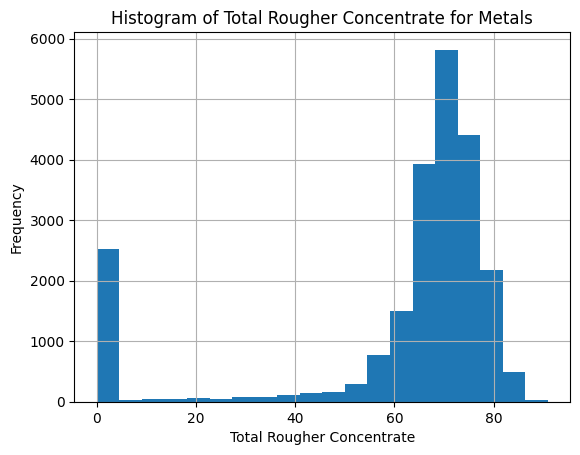

In [194]:
# Display the histogram
df_full['total_rough_concentrate'].hist(bins=20)
plt.title('Histogram of Total Rougher Concentrate for Metals')
plt.xlabel('Total Rougher Concentrate')
plt.ylabel('Frequency')
plt.show()


In [195]:
# Create a table of descriptive statistics
table_data = {
    'Statistic': ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'],
    'Total Rougher Concentrate': df_full['total_rough_concentrate'].describe()
}

# Convert to DataFrame
df_table = pd.DataFrame(table_data)
df_table.set_index('Statistic', inplace=True)

# Display the table
print("Descriptive Statistics for Total Rougher Concentrate of Metals:")
display(df_table)

Descriptive Statistics for Total Rougher Concentrate of Metals:


,Total Rougher Concentrate
Statistic,
Count,22716.000000
Mean,61.378090
Std,23.558863
Min,0.000000
25%,63.263228
50%,69.399690
75%,74.015593
Max,90.964431


In [196]:
feature_final_concentrate = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

In [197]:
# Compute the total final concentrate for each row
df_full['total_final_concentrate'] = df_full[feature_final_concentrate].sum(axis=1)

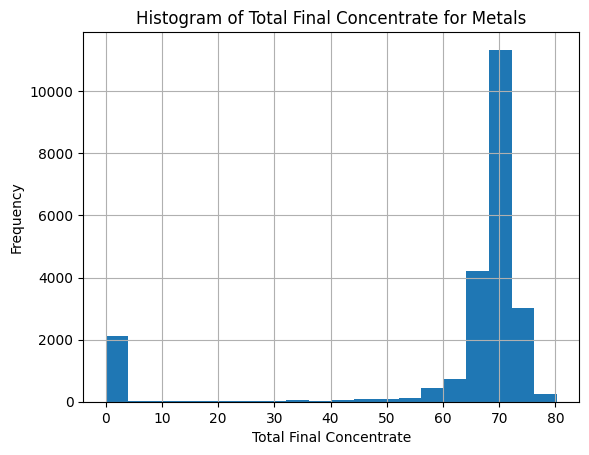

In [198]:
# Display the histogram
df_full['total_final_concentrate'].hist(bins=20)
plt.title('Histogram of Total Final Concentrate for Metals')
plt.xlabel('Total Final Concentrate')
plt.ylabel('Frequency')
plt.show()

In [199]:
# Create a table of descriptive statistics
table_data = {
    'Statistic': ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'],
    'Total Final Concentrate': df_full['total_final_concentrate'].describe()
}

# Convert to DataFrame
df_table = pd.DataFrame(table_data)
df_table.set_index('Statistic', inplace=True)

# Display the table
print("Descriptive Statistics for Total Final Concentrate of Metals:")
display(df_table)

Descriptive Statistics for Total Final Concentrate of Metals:


,Total Final Concentrate
Statistic,
Count,22716.000000
Mean,62.166910
Std,20.954107
Min,0.000000
25%,67.005682
50%,69.230638
75%,71.127337
Max,80.210644


Upon analyzing the total substance concentrations at different stages of the purification process, several insights and anomalies can be identified:

1. Total Input Concentration:
  * The histogram of the total input concentration for metals shows a roughly normal distribution with a mean of approximately 51.58.
  * The minimum value of 0 indicates that there might be some rows with missing values or anomalies where the total concentration is not recorded.
2. Total Rougher Concentrate:
  * The histogram of the total rougher concentrate for metals displays a distribution with a mean of around 61.38.
  * Similar to the total input concentration, there are instances where the total rougher concentrate is recorded as 0, which could signify anomalies or missing data.
3. Total Final Concentrate:
  * The histogram of the total final concentrate for metals exhibits a distribution with a mean of approximately 62.17.
  * Like the previous stages, there are occurrences where the total final concentrate is recorded as 0, indicating potential anomalies or missing values.

Insights:
  * Across all stages, the majority of the total concentrations fall within certain ranges, as evidenced by the peaks in the histograms.
  * However, the presence of minimum values of 0 suggests anomalies or missing data points that need to be addressed.
  * It's crucial to investigate the rows where the total concentration is recorded as 0 to determine whether these values are genuine or the result of data recording issues.

Action:
  * Anomalies identified, especially the instances with 0 concentration, should be further investigated and, if necessary, corrected or removed to ensure the integrity and accuracy of the dataset.
  * Imputation techniques or interpolation methods could be employed to fill in missing values if the anomalies are deemed genuine data points.
  * Conducting a thorough data cleansing process will enhance the reliability of subsequent analyses and modeling tasks.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [200]:
THRESHOLD = 0.1

df_train = df_train[df_train[feature_input_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[feature_rough_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[feature_final_concentrate].sum(1) > THRESHOLD]

In [201]:
df_train.shape

(14601, 87)

## Handle missing Values

In [202]:
columns_used = df_test.columns.values.tolist()
columns_used.append('rougher.output.recovery')
columns_used.append('final.output.recovery')

In [203]:
df_train_fixed = df_train[columns_used]

In [204]:
df_train_fixed = df_train_fixed[df_train_fixed['rougher.output.recovery'].notnull()].reset_index(drop=True)
df_train_fixed = df_train_fixed[df_train_fixed['final.output.recovery'].notnull()].reset_index(drop=True)

In [205]:
df_train_fixed.shape

(13789, 55)

In [206]:
df_full_fixed = pd.concat([df_train_fixed, df_test])

In [207]:
df_full_fixed.isnull().mean().sort_values(ascending=False)

final.output.recovery                         0.298091
rougher.output.recovery                       0.298091
rougher.input.floatbank11_xanthate            0.038076
rougher.state.floatbank10_e_air               0.019852
primary_cleaner.input.sulfate                 0.016340
primary_cleaner.input.depressant              0.015780
rougher.input.floatbank10_sulfate             0.014558
primary_cleaner.input.xanthate                0.013337
secondary_cleaner.state.floatbank2_a_air      0.011861
rougher.input.feed_size                       0.008195
rougher.input.feed_sol                        0.007228
rougher.input.floatbank10_xanthate            0.006617
rougher.input.feed_pb                         0.005905
rougher.input.floatbank11_sulfate             0.004225
rougher.input.feed_rate                       0.002443
secondary_cleaner.state.floatbank2_b_air      0.002138
secondary_cleaner.state.floatbank3_a_air      0.001934
secondary_cleaner.state.floatbank4_a_air      0.001018
primary_cl

In [208]:
for cols in df_full_fixed.isnull().mean().sort_values(ascending=False)[2:-2].index:
    median_cols = df_full_fixed[cols].median()
    df_full_fixed[cols] = df_full_fixed[cols].fillna(median_cols)

In [209]:
df_test_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].isnull()]
df_test_final = df_test_final.drop(columns=['rougher.output.recovery', 'final.output.recovery'])

In [210]:
df_train_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].notnull()].reset_index(drop=True)

In [211]:
df_train_final.shape, df_test_final.shape

((13789, 55), (5856, 53))

In [212]:
df_train_final.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [213]:
df_test_final.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

# 3. Model Development

In [214]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2
    return (error/scale).mean() * 100

In [215]:
def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])
    return 0.25 * rougher + 0.75 * final

## 3.1. Develop a function to calculate the final sMAPE metric.

## Train and evaluate various machine learning models using cross-validation. Select the best-performing model for testing on the test dataset.

In [216]:
features = df_test_final.drop(columns=['date']).columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']

In [217]:
features_train = df_train_final[features].reset_index(drop=True)
target_train = df_train_final[targets].reset_index(drop=True)
target_train.columns = [0, 1]

In [218]:
features_test = df_test_final[features].reset_index(drop=True)
target_test = df_full[df_full['date'].isin(df_test_final['date'])][targets].reset_index(drop=True)
target_test.columns = [0, 1]

In [219]:
target_train.isnull().sum()

0    0
1    0
dtype: int64

In [220]:
target_test.isnull().sum()

0    546
1    442
dtype: int64

In [221]:
target_train.fillna(0, inplace=True)
target_test.fillna(0, inplace=True)

In [222]:
target_test.isnull().sum()

0    0
1    0
dtype: int64

In [223]:
target_test = target_test.replace(np.inf, 0).replace(-np.inf, 0)

In [224]:
def class_eval(model, cv=4):
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)

        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)

        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        pred_test = pd.DataFrame(model.predict(features_test))

    # Show Metrics
    # smape_weighted
    smape_weighted_train = smape_weighted(target_valid, pred_valid)
    smape_weighted_test = smape_weighted(target_test, pred_test)
    mae_train = mean_absolute_error(target_valid, pred_valid)
    mae_test = mean_absolute_error(target_test, pred_test)

    # Show Output
    print('----------------Training----------------')
    print('sMAPE akhir  :', round(smape_weighted_train, 2))
    print('MAE          :', round(mae_train, 2))

    print('\n----------------Testing----------------')
    print('sMAPE akhir  :', round(smape_weighted_test, 2))
    print('MAE          :', round(mae_test, 2))


### Linear Regression

In [225]:
model_lr = LinearRegression()

In [226]:
lr_score = class_eval(model_lr)

----------------Training----------------
sMAPE akhir  : 11.85
MAE          : 7.85

----------------Testing----------------
sMAPE akhir  : 25.87
MAE          : 10.37


Results from the evaluation process are telling:
  * On the training data, the model achieved an sMAPE score of 11.85% and an MAE of 7.85. These results suggest that, on average, the model's predictions are within 11.85% of the actual values for the weighted combination of rougher and final output stages. The MAE further indicates the average magnitude of errors in the model's predictions.
  * On the testing data, the performance deteriorated, with an sMAPE score of 25.87% and an MAE of 10.37. The higher sMAPE and MAE on the testing data as compared to the training data indicate a drop in predictive accuracy when the model is applied to new, unseen data.

Insights:
  * The discrepancy between training and testing performance suggests a degree of overfitting to the training data. While the model learns the training data well, its ability to generalize to new data is limited.
  * The weighted sMAPE provides a useful metric for prioritizing the accuracy of the most economically relevant predictions (the final output), highlighting the model's practical utility in optimizing the mineral processing pipeline.

In conclusion, while the Linear Regression model shows promising results on the training data, its performance on the test data highlights the need for further model optimization or the exploration of more complex models to improve generalization. Additionally, the evaluation underscores the importance of using metrics like sMAPE that align closely with the business objectives, in this case, the efficient and effective processing of mineral ores.

### Random Forest

In [227]:
model_rf = RandomForestRegressor(max_depth=1, n_estimators=50, random_state=12345)

In [228]:
rf_score = class_eval(model_rf)

----------------Training----------------
sMAPE akhir  : 10.85
MAE          : 7.76

----------------Testing----------------
sMAPE akhir  : 25.47
MAE          : 11.82


The evaluation of a RandomForestRegressor model, configured with a maximum depth of 1 and 50 estimators, provides an interesting comparison to the previously discussed Linear Regression model in the context of mineral processing data.

Here’s a detailed narrative of the process and insights drawn from the RandomForestRegressor model's performance metrics:

Training Performance
  * The model achieved a sMAPE score of 10.85% and an MAE of 7.76 on the training data. Compared to the Linear Regression model, the RandomForestRegressor shows a slight improvement in both metrics.
  * This improvement suggests that even with a simplistic tree depth, the ensemble approach of random forests can capture the data's underlying patterns slightly better than a linear model.

Testing Performance
  * On the test set, the sMAPE is 25.47%, and the MAE is 11.82. Similar to the Linear Regression model, a significant increase in error rates is observed when moving from training to testing data.
  * Interestingly, while the sMAPE improves marginally compared to the Linear Regression model, indicating a slightly better average percentage error, the MAE increases. This indicates that the RandomForestRegressor, despite its slightly better relative error distribution, tends to have larger average errors on the test data.

Insights and Implications
  * The marginal improvement in testing sMAPE suggests that the ensemble method offers a slight advantage over linear regression in generalizing to unseen data. However, the increase in MAE suggests that for certain predictions, the errors are substantially larger.
  * The shallow depth of the trees might be limiting the model's ability to fully capture the complexity of the relationships in the data. While deeper trees might improve performance, they also risk overfitting, which is a delicate balance to manage.
  * The slight improvement in sMAPE underscores the utility of ensemble methods in dealing with complex datasets, but it also highlights the importance of model configuration. Tuning the model's parameters, such as increasing the depth of the trees or the number of estimators, could potentially improve performance but must be done with care to avoid overfitting.

Conclusion

The RandomForestRegressor demonstrates a nuanced improvement over Linear Regression, suggesting that ensemble methods can offer advantages in predictive accuracy for mineral processing data. However, the model's configuration is crucial, and even with better tools, achieving high accuracy on unseen data remains challenging. This evaluation reiterates the importance of model selection and tuning in predictive modeling, especially in complex industrial applications where predictive accuracy can have significant economic implications.


# Conclusion

Embarking on a quest to enhance the gold recovery process for Zyfra, we ventured into the realm of data science, aiming to unravel the complexities of gold ore processing through predictive modeling. This journey, grounded in the meticulous analysis of mineral processing data, embarked upon validating gold yield calculations, dissecting the data's structure, and understanding the intricate dance of metal concentrations through purification stages. Our narrative unfolds across two acts: the exploration with Linear Regression and the nuanced insights from a RandomForestRegressor model.

**Act I: Setting the Stage with Linear Regression**

Our first protagonist, the Linear Regression model, offered a straightforward approach, assuming a linear relationship between the myriad of factors influencing gold recovery. Through the lens of sMAPE and MAE, we measured its predictions against reality, revealing a commendable performance on the training stage but a humbling encounter with the complexities of unseen data. This act taught us about overfitting—like an actor too rehearsed, unable to improvise when the script changes.

**Act II: A Twist in the Tale with RandomForestRegressor**

Enter RandomForestRegressor, a model of depth and ensemble, promising to navigate the non-linear intricacies of our data with grace. Yet, constrained by simplicity—a depth of one—it offered glimpses of improvement but also echoed the challenges of generalization. It was a tale of slight gains and reminders that in the quest for precision, complexity and simplicity must dance in harmony.

**Interlude: The Insights and Lessons**

From these acts, two truths emerged. First, the path to optimizing gold recovery is paved with the need for models that can capture the richness of the process, acknowledging that every step from ore to gold bar is a story of transformation. Second, the wisdom in the weighting of errors, a recognition that the final quality of gold bears more significance, guiding our focus towards models that excel in predicting the final act of the purification process.

**The Next Steps: Charting the Course Forward**

As we stand at the crossroads, the journey ahead is illuminated by the insights gained. Our next steps are guided by the lessons of the past and the vision for a future where data science and mineral processing walk hand in hand:
1. Delve Deeper into the Data: A closer examination of feature engineering, exploring how each variable dances through the stages of gold recovery, might reveal hidden melodies that our models have yet to hear.
2. Complexity with Caution: Venturing into more complex models, like Gradient Boosting or Deep Learning, promises a richer understanding but demands a mindful approach to avoid the siren call of overfitting.
3. Cross-validation and Beyond: Enhancing our validation techniques, perhaps through time-based splits or more granular cross-validation strategies, to ensure our models are truly ready for the unpredictability of the real world.
4. Operational Integration: Moving beyond metrics, the true test lies in integrating these predictive models into Zyfra's operational fabric, transforming insights into actions that enhance gold recovery efficiency.
5. Continuous Learning: As in any quest, the landscape of data and technology is ever-evolving. A commitment to continuous learning and adaptation will be our compass.

In sharing this narrative, we aim not just to chronicle a journey of models and metrics but to paint a picture of the potential that lies in the confluence of data science and mineral processing. For Zyfra, and indeed for the industry at large, this venture into predictive modeling is more than a technical endeavor; it's a step towards reimagining the future of mineral processing, where every ounce of gold recovered is a testament to the synergy of human insight and machine intelligence.